Part a - Seperating the image into hue,saturation and value planes.

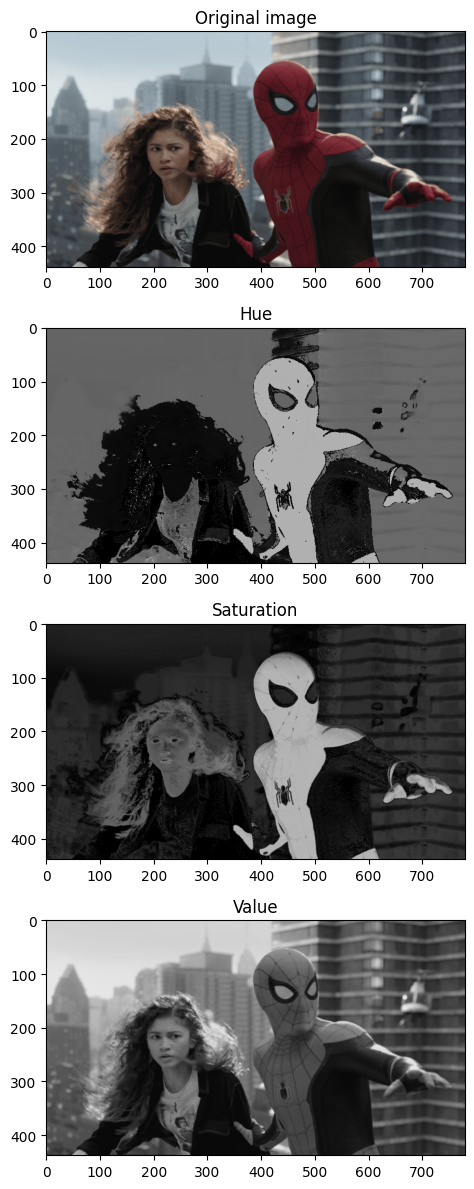

In [7]:
import cv2
import matplotlib.pyplot as plt

color = cv2.imread("spider.png", 1)
fig, ax = plt.subplots(4, 1, figsize=(8, 12))

color_rgb = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)  # Convert the BGR image to RGB format for Matplotlib

ax[0].imshow(color_rgb)
ax[0].set_title('Original image', fontsize=12)

hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h_rgb = cv2.cvtColor(h, cv2.COLOR_GRAY2RGB)
s_rgb = cv2.cvtColor(s, cv2.COLOR_GRAY2RGB)
v_rgb = cv2.cvtColor(v, cv2.COLOR_GRAY2RGB)

ax[1].imshow(h_rgb)
ax[1].set_title('Hue', fontsize=12)
ax[2].imshow(s_rgb)
ax[2].set_title('Saturation', fontsize=12)
ax[3].imshow(v_rgb)
ax[3].set_title('Value', fontsize=12)

plt.tight_layout()
plt.show()


Part b - Applying the transformation

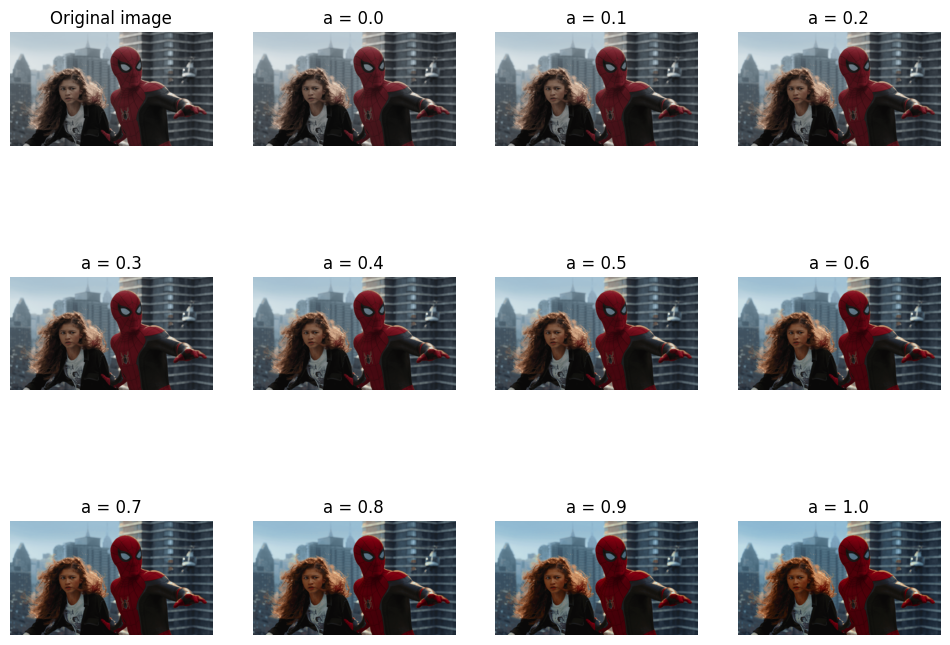

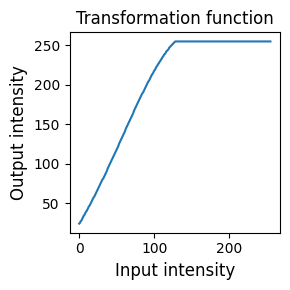

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def f(x, a, sigma=70):
    f = x + (a * 128) * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2))
    return min(f, 255)

color = cv2.imread("spider.png", 1)
rgb_color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)

a_values = np.arange(0, 1.1, 0.1)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes[0, 0].imshow(rgb_color)
axes[0, 0].set_title('Original image', fontsize=12)
axes[0, 0].axis('off')

for i, a in enumerate(a_values):
    transform = np.array([f(x, a) for x in range(256)]).astype(np.uint8)
    transformed_s = cv2.LUT(s, transform)
    hsv_new = cv2.merge([h, transformed_s, v])
    rgb_result = cv2.cvtColor(hsv_new, cv2.COLOR_HSV2RGB)
    
    row = (i + 1) // 4  # Calculate the row index
    col = (i + 1) % 4   # Calculate the column index
    axes[row, col].imshow(rgb_result)
    axes[row, col].set_title(f'a = {a:.1f}', fontsize=12)
    axes[row, col].axis('off')

fig,axis = plt.subplots(1,1,figsize=(3,3))
axis.plot(transform)
axis.set_title('Transformation function', fontsize=12)
axis.set_xlabel('Input intensity', fontsize=12)
axis.set_ylabel('Output intensity', fontsize=12)



plt.tight_layout()
plt.show()


The most visually pleasing outcome is received by a = 0.5